<a href="https://colab.research.google.com/github/kunal-kumar-chaudhary/covid-19-tweets-sentiment-analysis/blob/main/Covid_19_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
filepath = "/content/archive (10).zip"
with zipfile.ZipFile(filepath, "r") as zip_ref:
  zip_ref.extractall("covid_19_tweets_data")

In [ ]:
import pandas as pd
train_data =  pd.read_csv("/content/covid_19_tweets_data/Corona_NLP_train.csv", encoding="ISO-8859-1")
test_data = pd.read_csv("/content/covid_19_tweets_data/Corona_NLP_test.csv", encoding="ISO-8859-1")

In [ ]:
# now let's make copy of our original data
training = train_data.copy()
testing = test_data.copy()

In [ ]:
training.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
testing.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
# let's take our dependent and independent data from our dataset 
training = training[['OriginalTweet', 'Sentiment']]
testing = testing[['OriginalTweet', 'Sentiment']]

In [ ]:
# for now, we will focus more upon our training data
training.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# what's the length of our training and testing data
len(training), len(testing)

(41157, 3798)

In [ ]:
# let's clean out independent data
# we will delete all the URL'S and tags from the tweet
training['OriginalTweet'] = training['OriginalTweet'].str.replace(r"http\S", "", regex=True)
testing['OriginalTweet'] = testing['OriginalTweet'].str.replace(r"http\S", "", regex=True)
training['OriginalTweet'] = training['OriginalTweet'].str.replace(r"@\S", "", regex=True)
testing['OriginalTweet'] = testing['OriginalTweet'].str.replace(r"@\S", "", regex=True)

In [ ]:
# let's find out the average number of words per line.
"""
for this we will need to calculate the total number of words in our 'OriginalTweets' column
and divide it by the total number of rows in our training sample. so this way we will get the 
average number of words per tweet.
"""
sum=0
for i in training['OriginalTweet']:
  sum = sum + len(i.split())
print(sum)

average_words = sum/len(training)
print(average_words)


1255274
30.499647690550816


so there are 30 words approx per tweet, let's proceed..

In [ ]:
# let's look a bit at the labels
training.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
l = {
    'Positive':0,
     'Extremely Positive':0,
     'Negative':2,
     'Extremely Negative':2,
     'Neutral':1
}

In [ ]:
# let's encode these values of sentiments 
training['Sentiment'] = training['Sentiment'].map(l)
testing['Sentiment'] = testing['Sentiment'].map(l)

In [ ]:
# let's view the encoded value
print(training['Sentiment'].unique())
print(testing['Sentiment'].unique())

[1 0 2]
[2 0 1]


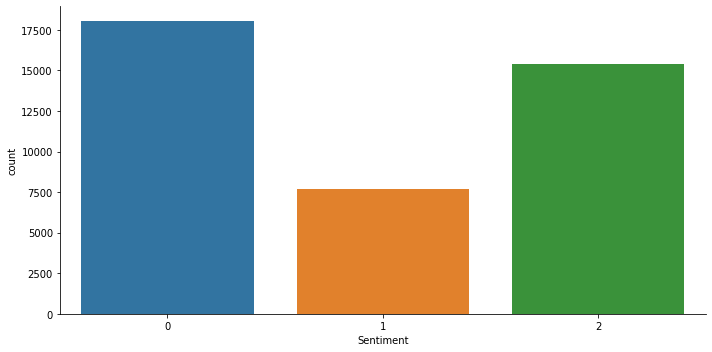

In [ ]:
import seaborn as sns
sns.catplot(x = 'Sentiment', kind = 'count', data = training, height = 5, aspect = 2)

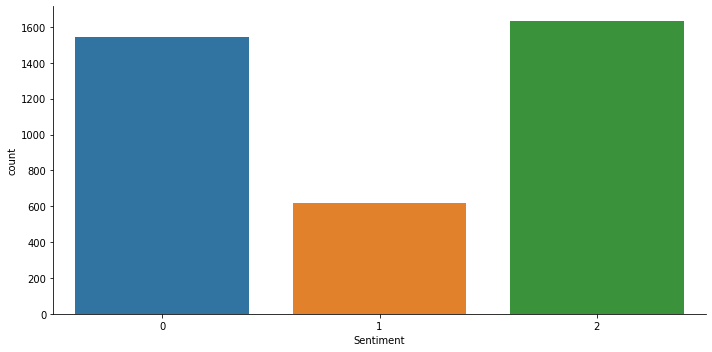

In [ ]:
sns.catplot(x = 'Sentiment', kind = 'count', data = testing, height = 5, aspect = 2)

we will split our data into independent and dependent variables which will be helpful to us at the time of training.

In [ ]:
training_x = training['OriginalTweet']
training_y = training['Sentiment']
testing_x = testing['OriginalTweet']
testing_y = testing['Sentiment']

In [ ]:
import numpy as np

training_x = np.array(training_x)
training_y = np.array(training_y)
testing_x = np.array(testing_x)
testing_y = np.array(testing_y)

In [ ]:
training_x

array(['eNyrbie hil_Gahan hrisitv ://t.co/iFz9FAn2Pa and ://t.co/xX6ghGFzCC and ://t.co/I2NlzdxNo8',
       'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
       'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak ://t.co/bInCA9Vp8P',
       ...,
       'You know itÂ\x92s getting tough when ameronWilds  is rationing toilet paper #coronavirus #toiletpaper roger martinsville, help us out!!',
       'Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus',
       "artiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been wors

In [ ]:
training_y 

array([1, 0, 0, ..., 0, 1, 2])

## TOKENIZATION

now we will tokenize our words in

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# maximum number of words to have in our dictionary (vocabulary will have 6000 most commom words)
max_vocab_length = 6000
# maximum length of sequence
max_length = 128
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(training_x)

In [ ]:
# create a sample sentence and tokenize it
sample_sentence = ['This is kunal kumar and is currently tokenizing the sentences']
text_vectorizer(sample_sentence)

<tf.Tensor: shape=(1, 120), dtype=int64, numpy=
array([[ 16,  11,   1,   1,   4,  11, 670,   1,   2,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]])>

In [ ]:
# choose a random sentence from our training data and tokenize it
import random
random_sentence = random.choice(training_x)
print(f"original sentence : \n\n {random_sentence} \
      \n \nvectorized version:\n" )
text_vectorizer([random_sentence])

original sentence : 

 Never did I think I would see the day that finding toilet paper AND Purell at the store would bring such emotional relief to my day... #COVID19 #coronavirus #toiletpaper #purell #goldmine       
 
vectorized version:



<tf.Tensor: shape=(1, 120), dtype=int64, numpy=
array([[ 313,  331,   15,  158,   15,  137,  126,    2,  138,   23, 1259,
         105,  111,    4, 3208,   18,    2,   21,  137,  671,  341, 3732,
         513,    3,   38,  138,    9,    8,   98, 3208,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

## Embedding

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, output_dim = 128, input_length = max_length)

In [ ]:
# turn a random sentence from our training data into it's embeddings
import random
random_sentence = random.choice(training_x)
print(f"original sentence : \n\n {random_sentence} \
      \n \n embeddings: \n" )
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original sentence : 

 remierleague  30% pay cut . 20 million to the HSuk .  125 million to FL and national league .   #AboutTime . Takes about 2 seconds to put gate prices up tho ! #COVID2019 #coronavirus arksaggers Nev2 aryLineker tanCollymore alkSPORTDrive .       
 
 embeddings: 



<tf.Tensor: shape=(1, 120, 128), dtype=float32, numpy=
array([[[-0.03376742, -0.02006429,  0.04400369, ...,  0.00951624,
          0.01746773,  0.00429744],
        [-0.02344058, -0.00579721, -0.01364541, ..., -0.04974399,
          0.04698545, -0.01106367],
        [-0.04495072,  0.03202404, -0.02171657, ..., -0.02661738,
         -0.01222818,  0.01093512],
        ...,
        [-0.02408396,  0.03915974,  0.00507549, ...,  0.04944534,
         -0.01133133,  0.02329605],
        [-0.02408396,  0.03915974,  0.00507549, ...,  0.04944534,
         -0.01133133,  0.02329605],
        [-0.02408396,  0.03915974,  0.00507549, ...,  0.04944534,
         -0.01133133,  0.02329605]]], dtype=float32)>

In [ ]:
sample_embed[0][0] # this is a vector of length 128

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.03376742, -0.02006429,  0.04400369, -0.0303929 , -0.03197639,
       -0.04733649, -0.0140378 , -0.01049557,  0.03126831, -0.01779575,
       -0.03614832, -0.0219606 ,  0.00214327, -0.04561079,  0.02791916,
        0.0252502 , -0.03239466,  0.04474473, -0.0180902 ,  0.02058239,
       -0.00239357, -0.0270668 , -0.02475676, -0.02395327,  0.00027187,
       -0.04178482, -0.01703675, -0.03034467, -0.00101354, -0.00640015,
       -0.03770886, -0.01191101, -0.02898601, -0.03754104,  0.02289538,
        0.01283205,  0.03619793,  0.04125843, -0.02337735,  0.04923279,
       -0.04110109,  0.02024534,  0.01559595, -0.0307367 ,  0.03513975,
       -0.04741425,  0.02463675,  0.03342792, -0.04688286, -0.0028775 ,
        0.01750172,  0.04397264, -0.04650399,  0.00478507,  0.0305879 ,
        0.0322044 , -0.04365272, -0.04064158, -0.04060928, -0.02852362,
       -0.03577254,  0.02418412,  0.0109941 ,  0.03664828, -0.01434278,
       -0.034761

## let's use the callback for early stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights = True)

## MODEL 1: NAIVE BAYES with `TFIDF`

for this model, we will use `tfifdf` to convert out text into numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# creating tokenization and creating pipeline

model_1 = Pipeline(
    [
     ('tfidf', TfidfVectorizer()), # converts words to numbers
     ('classifier', MultinomialNB()) # model the text
    ]
)

model_1.fit(training_x, training_y)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# evaluating our base line model
model_1_score = model_1.score(testing_x, testing_y)
model_1_score

0.6174302264349658

In [ ]:
y_preds_1 = model_1.predict(testing_x)
y_preds_1

array([2, 0, 0, ..., 0, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_score(y_true, y_pred):
  """
  calculates model accuracy, precision, recall, f1-score
  """
  # calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # calculate model precision, recall, f1-score using weighted score
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {
      'accuracy': model_accuracy,
      'precision': precision,
      'recall': recall,
      'f1-score': f1_score
  }
  return model_results

In [ ]:
# let's see the different evaluation scores
model_1_parameters = calculate_score(testing_y, y_preds_1)
model_1_parameters

{'accuracy': 61.74302264349658,
 'f1-score': 0.5606516105884733,
 'precision': 0.6417437009649759,
 'recall': 0.6174302264349658}

our model is not performing well with Naive bayes classifier.

## MODEL 2: A SIMPLE DENSE MODEL

In [ ]:
# Building model with functional API
from tensorflow.keras import layers
input = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(input) # turn the inputs into numbers
x = embedding(x) # creating a embedding of numerized input
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector of each token to one vector
output = layers.Dense(3, activation='softmax')(x) # create the output layer
model_2 = tf.keras.Model(input, output, name='model_2')

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 120)               0         
_________________________________________________________________
embedding (Embedding)        (None, 120, 128)          768000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 768,387
Trainable params: 768,387
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
training_x.shape, training_y.shape, testing_x.shape, testing_y.shape

((41157,), (41157,), (3798,), (3798,))

note -  we can visit below link for additional reference on how and when to use different loss functions.

https://www.analyticsvidhya.com/blog/2021/05/guide-for-loss-function-in-tensorflow/

In [ ]:
model_2_history = model_2.fit(training_x, training_y, epochs=20, validation_data=(testing_x, testing_y),
                              callbacks=[callback])

Epoch 1/20
1287/1287 [==============================] - 13s 8ms/step - loss: 0.9192 - accuracy: 0.5735 - val_loss: 0.7739 - val_accuracy: 0.6922
Epoch 2/20
1287/1287 [==============================] - 10s 8ms/step - loss: 0.6826 - accuracy: 0.7380 - val_loss: 0.6565 - val_accuracy: 0.7491
Epoch 3/20
1287/1287 [==============================] - 10s 8ms/step - loss: 0.5545 - accuracy: 0.8066 - val_loss: 0.5930 - val_accuracy: 0.7783
Epoch 4/20
1287/1287 [==============================] - 10s 8ms/step - loss: 0.4817 - accuracy: 0.8419 - val_loss: 0.5683 - val_accuracy: 0.7928
Epoch 5/20
1287/1287 [==============================] - 10s 8ms/step - loss: 0.4372 - accuracy: 0.8605 - val_loss: 0.5613 - val_accuracy: 0.8060
Epoch 6/20
1287/1287 [==============================] - 10s 8ms/step - loss: 0.4072 - accuracy: 0.8734 - val_loss: 0.5711 - val_accuracy: 0.8002
Epoch 7/20
1287/1287 [==============================] - 10s 8ms/step - loss: 0.3878 - accuracy: 0.8792 - val_loss: 0.5793 - val_ac

we can see that there is little bit of overfitting which we will try and correct in upcoming models. as this was a very basic implementation just for completeness sake, the performance was not expected to be very good but too it performed good!

In [ ]:
model_2.evaluate(testing_x, testing_y)

119/119 [==============================] - 1s 4ms/step - loss: 0.5801 - accuracy: 0.8112


[0.5801413655281067, 0.811216413974762]

In [ ]:
# make some predictions and evaluate those
model_2_pred_prob = model_2.predict(testing_x)
model_2_pred_prob

array([[1.9476140e-01, 2.6755935e-01, 5.3767926e-01],
       [9.9041021e-01, 4.2386632e-03, 5.3511304e-03],
       [9.9672723e-01, 1.9784814e-03, 1.2943344e-03],
       ...,
       [1.2429982e-02, 9.6105480e-01, 2.6515177e-02],
       [1.4768535e-03, 8.7990280e-04, 9.9764317e-01],
       [9.9992633e-01, 4.4895096e-05, 2.8763592e-05]], dtype=float32)

In [ ]:
model_2_pred = tf.argmax(model_2_pred_prob, axis=1)
model_2_pred

<tf.Tensor: shape=(3798,), dtype=int64, numpy=array([2, 0, 0, ..., 1, 2, 0])>

In [ ]:
model_2_parameters = calculate_score(testing_y, model_2_pred)
model_2_parameters

{'accuracy': 81.1216429699842,
 'f1-score': 0.8102558973816759,
 'precision': 0.8100304447275625,
 'recall': 0.811216429699842}

### visualizing learned embeddings

In [ ]:
# get vocabulary from our text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()

len(words_in_vocab), print(words_in_vocab[:20])

['', '[UNK]', 'the', 'to', 'and', 'of', 'a', 'in', 'coronavirus', 'covid19', 'for', 'is', 'are', 'on', 'you', 'i', 'this', 'prices', 'at', 'food']


(6000, None)

In [ ]:
# get the weight matrix of the embedding layer which has been learnt over number of epochs
embed_weights = model_2.get_layer('embedding').get_weights()[0]
embed_weights, embed_weights.shape # for every token in our vocabulary, it is represented by a vector having 128 elements

(array([[-0.02510118,  0.02888777,  0.01657198, ...,  0.04941965,
         -0.00504614,  0.01846503],
        [ 0.00602842, -0.03975144,  0.02959633, ...,  0.01078783,
          0.01242294, -0.02696185],
        [ 0.05488031, -0.01311707,  0.03941305, ...,  0.04034562,
          0.04918649, -0.00497516],
        ...,
        [ 0.08337393,  0.00888483, -0.57242197, ...,  0.02902233,
         -0.52806807,  0.02013921],
        [-0.12403694,  0.01719497, -0.08919776, ..., -0.01942179,
         -0.06509644,  0.00939025],
        [-0.09115915, -0.01870085,  0.06703215, ...,  0.037857  ,
          0.01454925,  0.01881765]], dtype=float32), (6000, 128))

now we will visualize our embedding layer into a great tensorflow toolkit called projector.

In [ ]:
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

this below image is the visualization of embedding layer over embedding projector.

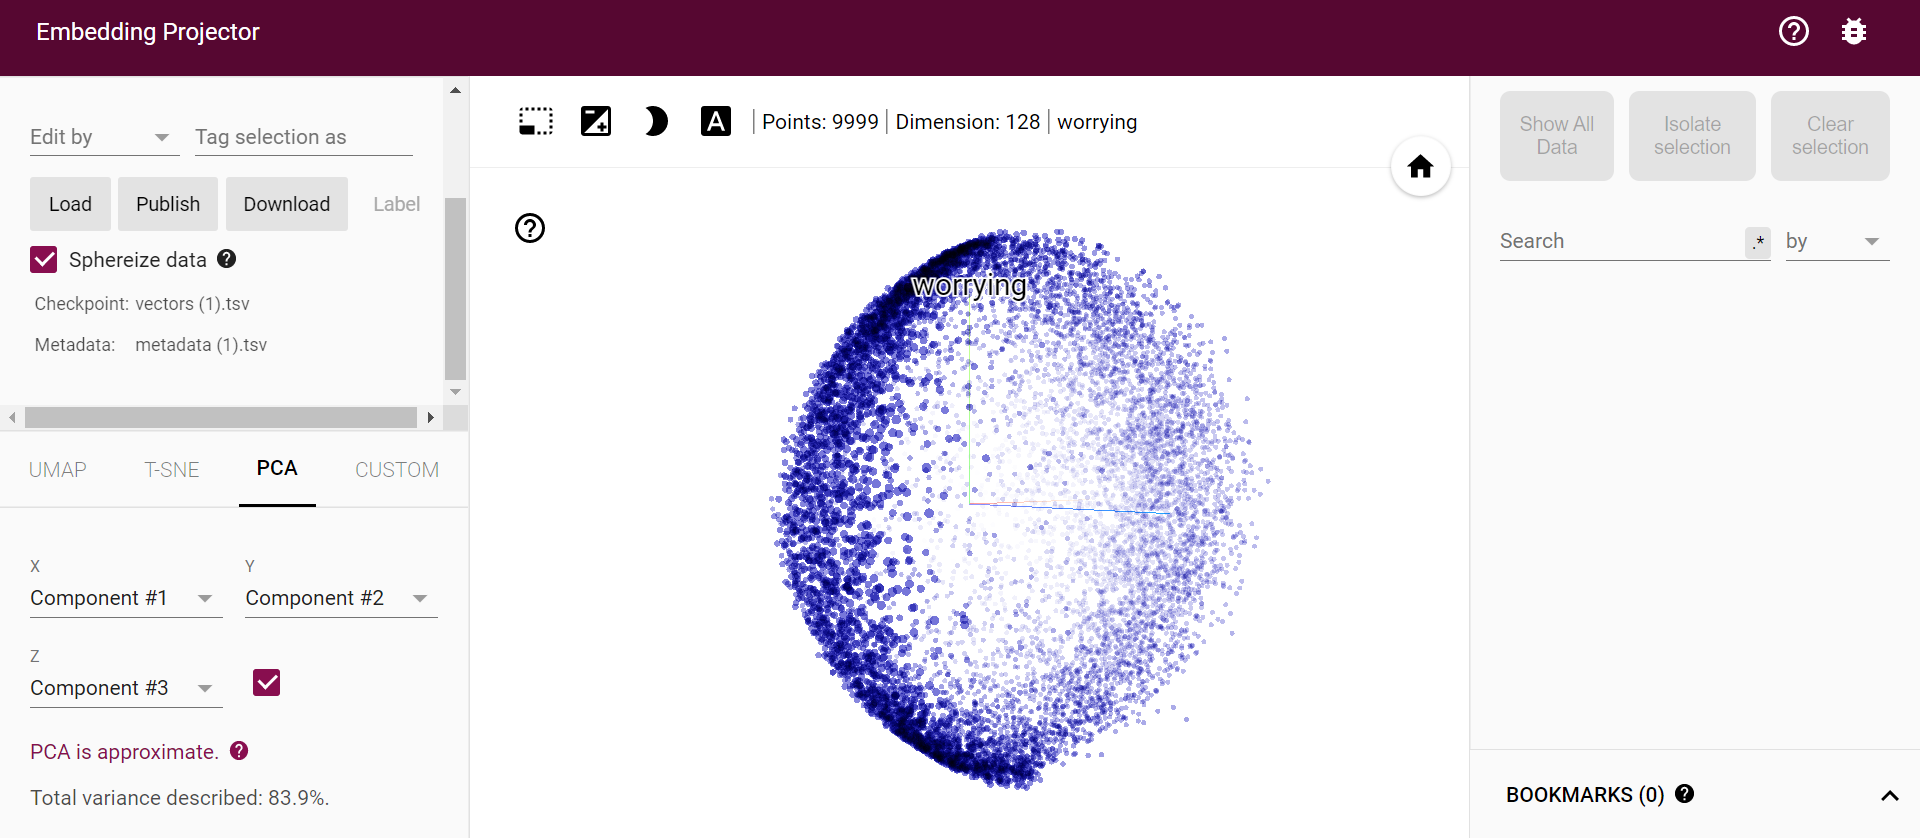

In [ ]:
# plotting loss and accuracy curve for model_2
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

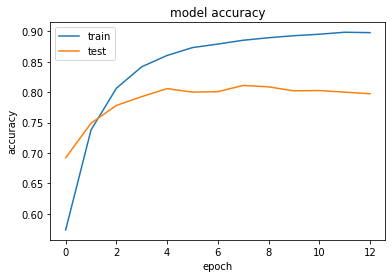

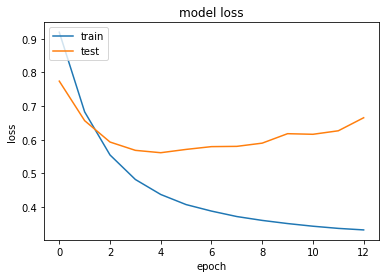

In [ ]:
plot_loss_accuracy(model_2_history)

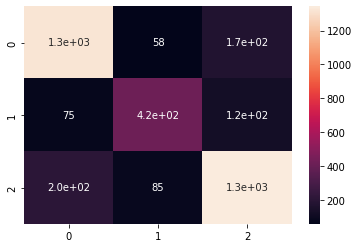

In [ ]:
# let's see the confusion matrix for the model's performance
from sklearn.metrics import confusion_matrix
confusion_matrix =  confusion_matrix(testing_y, model_2_pred)
sns.heatmap(confusion_matrix, annot=True)

## MODEL 3: LSTM (LONG SONG TERM MEMORY)

In [ ]:
input = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)

model_3 = tf.keras.Model(input, output, name='model_3')

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 120)               0         
_________________________________________________________________
embedding (Embedding)        (None, 120, 128)          768000    
_________________________________________________________________
lstm (LSTM)                  (None, 120, 64)           49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160

In [ ]:
# let's compile our model_3
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
# let's fit our model on training data
model_3_history = model_3.fit(training_x, training_y, epochs=5, validation_data=(testing_x, testing_y),
                              callbacks=[callback])

Epoch 1/5
1287/1287 [==============================] - 86s 62ms/step - loss: 1.0453 - accuracy: 0.4355 - val_loss: 1.0384 - val_accuracy: 0.4071
Epoch 2/5
1287/1287 [==============================] - 79s 61ms/step - loss: 1.0439 - accuracy: 0.4385 - val_loss: 1.0326 - val_accuracy: 0.4071
Epoch 3/5
1287/1287 [==============================] - 78s 61ms/step - loss: 1.0438 - accuracy: 0.4385 - val_loss: 1.0291 - val_accuracy: 0.4071
Epoch 4/5
1287/1287 [==============================] - 79s 61ms/step - loss: 1.0436 - accuracy: 0.4385 - val_loss: 1.0317 - val_accuracy: 0.4071
Epoch 5/5
1287/1287 [==============================] - 79s 61ms/step - loss: 1.0435 - accuracy: 0.4385 - val_loss: 1.0321 - val_accuracy: 0.4071


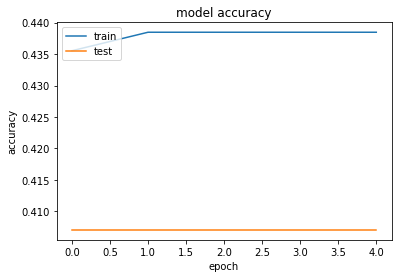

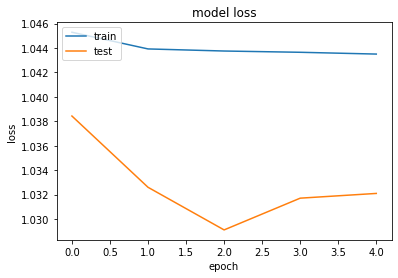

In [ ]:
# plotting loss and accuracy curve
plot_loss_accuracy(model_3_history)

In [ ]:
model_3.evaluate(testing_x, testing_y)

119/119 [==============================] - 3s 23ms/step - loss: 1.0321 - accuracy: 0.4071


[1.0320976972579956, 0.4070563316345215]

In [ ]:
model_3_pred_prob = model_3.predict(testing_x)
model_3_pred_prob

array([[0.43593752, 0.19224241, 0.37182   ],
       [0.43593755, 0.19224243, 0.37182003],
       [0.43593752, 0.19224241, 0.37182   ],
       ...,
       [0.43593755, 0.19224243, 0.37182003],
       [0.43593755, 0.19224243, 0.37182003],
       [0.43593752, 0.19224241, 0.37182   ]], dtype=float32)

In [ ]:
model_3_pred = tf.argmax(model_3_pred_prob, axis=1)
model_3_pred

<tf.Tensor: shape=(3798,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 0])>

In [ ]:
model_3_parameters = calculate_score(testing_y, model_3_pred)
model_3_parameters

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 40.7056345444971,
 'f1-score': 0.23551987651868458,
 'precision': 0.16569486836701558,
 'recall': 0.40705634544497105}

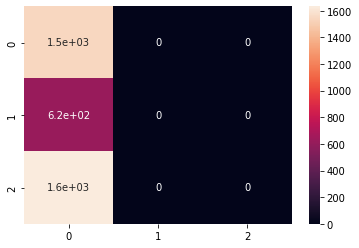

In [ ]:
# let's see the confusion matrix for the model's performance
from sklearn.metrics import confusion_matrix
confusion_matrix =  confusion_matrix(testing_y, model_3_pred)
sns.heatmap(confusion_matrix, annot=True)

## MODEL 4: GRU (GATED RECURRENT UNIT) & CONV1D

In [ ]:
input = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(128, 5, activation='relu')(x)
x = layers.MaxPool1D(pool_size=1)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Dropout(0.3)(x)

x = layers.Bidirectional(layers.GRU(32))(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)

model_4 = tf.keras.Model(input, output, name='model_4')

In [ ]:
model_4.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 120)               0         
_________________________________________________________________
embedding (Embedding)        (None, 120, 128)          768000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 128)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 116, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 116, 128)          0   

In [ ]:
# let's fit our model on our training data
model_4_history = model_4.fit(training_x, training_y, epochs=5, validation_data=(testing_x, testing_y),
                              callbacks=[callback])

Epoch 1/5
1287/1287 [==============================] - 76s 59ms/step - loss: 0.3141 - accuracy: 0.8957 - val_loss: 0.5116 - val_accuracy: 0.8249
Epoch 2/5
1287/1287 [==============================] - 75s 59ms/step - loss: 0.2992 - accuracy: 0.8990 - val_loss: 0.4891 - val_accuracy: 0.8346
Epoch 3/5
1287/1287 [==============================] - 76s 59ms/step - loss: 0.2789 - accuracy: 0.9081 - val_loss: 0.5117 - val_accuracy: 0.8354
Epoch 4/5
1287/1287 [==============================] - 76s 59ms/step - loss: 0.2713 - accuracy: 0.9098 - val_loss: 0.5006 - val_accuracy: 0.8386
Epoch 5/5
1287/1287 [==============================] - 76s 59ms/step - loss: 0.2534 - accuracy: 0.9156 - val_loss: 0.5342 - val_accuracy: 0.8341


In [ ]:
model_4_pred_prob = model_4.predict(testing_x)
model_4_pred_prob

array([[5.5919703e-02, 7.2280519e-02, 8.7179983e-01],
       [9.9064064e-01, 1.8694921e-03, 7.4898442e-03],
       [9.9774325e-01, 7.3520502e-04, 1.5216428e-03],
       ...,
       [1.0120485e-03, 9.9737972e-01, 1.6081746e-03],
       [3.5055061e-03, 2.2835250e-03, 9.9421096e-01],
       [9.9892479e-01, 3.0898521e-04, 7.6614326e-04]], dtype=float32)

In [ ]:
model_4_pred = tf.argmax(model_4_pred_prob, axis=1)
model_4_pred

<tf.Tensor: shape=(3798,), dtype=int64, numpy=array([2, 0, 0, ..., 1, 2, 0])>

In [ ]:
model_4.evaluate(testing_x, testing_y)

119/119 [==============================] - 3s 23ms/step - loss: 0.5342 - accuracy: 0.8341


[0.5341619253158569, 0.8341231942176819]

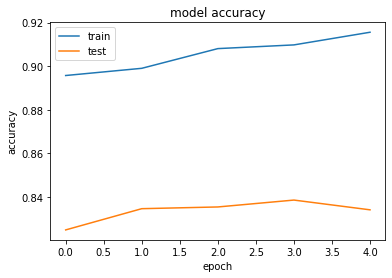

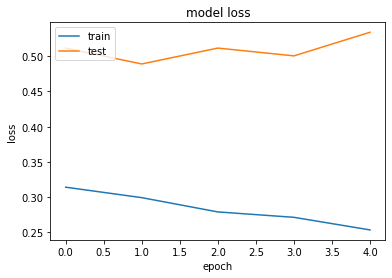

In [ ]:
plot_loss_accuracy(model_4_history)

In [ ]:
model_4_parameters = calculate_score(testing_y, model_4_pred)
model_4_parameters

{'accuracy': 83.41232227488152,
 'f1-score': 0.8328548078787004,
 'precision': 0.8343310012236838,
 'recall': 0.8341232227488151}

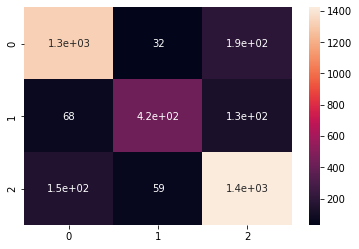

In [ ]:
# let's see the confusion matrix for the model's performance
from sklearn.metrics import confusion_matrix
confusion_matrix =  confusion_matrix(testing_y, model_4_pred)
sns.heatmap(confusion_matrix, annot=True)

## MODEL 5: LSTM & CONV1D

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(16, 5, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv1D(32, 5, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv1D(64, 5, activation='relu')(x)
x = layers.MaxPool1D(pool_size=4)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(16, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)
model_5 = tf.keras.Model(inputs, output, name='model_5')

In [ ]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 128)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 128, 128)          768000    
_________________________________________________________________
dropout_29 (Dropout)         (None, 128, 128)          0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 124, 16)           10256     
_________________________________________________________________
dropout_30 (Dropout)         (None, 124, 16)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 120, 32)           2592

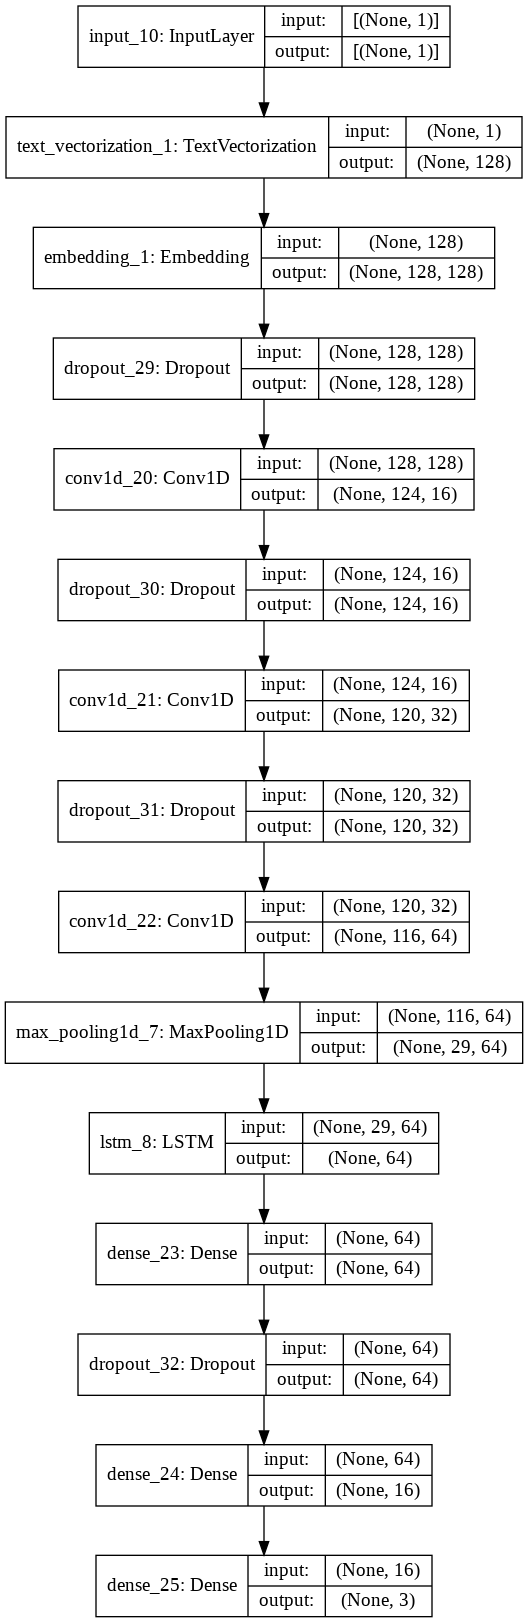

In [ ]:
# plotting model graph

from keras.utils.vis_utils import plot_model
plot_model(model_5, show_shapes=True, show_layer_names=True, to_file='model_5.png')
from IPython.display import Image
Image(retina=True, filename='model_5.png')

In [ ]:
# let's compile our model

adam = tf.keras.optimizers.Adam(learning_rate=0.0005, name='Adam')

model_5.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
# let's fit our model
model_5_history = model_5.fit(training_x, training_y, epochs=7, validation_data=(testing_x, testing_y),
                              callbacks=[callback])

Epoch 1/7
1287/1287 [==============================] - 85s 18ms/step - loss: 0.7763 - accuracy: 0.6070 - val_loss: 0.6687 - val_accuracy: 0.7620
Epoch 2/7
1287/1287 [==============================] - 21s 16ms/step - loss: 0.4643 - accuracy: 0.8445 - val_loss: 0.5079 - val_accuracy: 0.8220
Epoch 3/7
1287/1287 [==============================] - 21s 16ms/step - loss: 0.4000 - accuracy: 0.8693 - val_loss: 0.5208 - val_accuracy: 0.8157
Epoch 4/7
1287/1287 [==============================] - 23s 17ms/step - loss: 0.3691 - accuracy: 0.8803 - val_loss: 0.4989 - val_accuracy: 0.8291
Epoch 5/7
1287/1287 [==============================] - 24s 19ms/step - loss: 0.3407 - accuracy: 0.8901 - val_loss: 0.4847 - val_accuracy: 0.8402
Epoch 6/7
1287/1287 [==============================] - 24s 19ms/step - loss: 0.3199 - accuracy: 0.8970 - val_loss: 0.4739 - val_accuracy: 0.8460
Epoch 7/7
1287/1287 [==============================] - 24s 19ms/step - loss: 0.3033 - accuracy: 0.9036 - val_loss: 0.4712 - val_ac

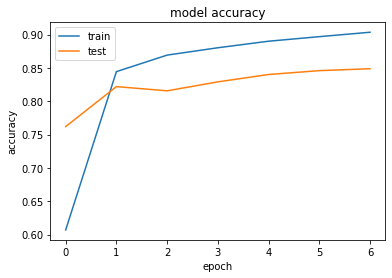

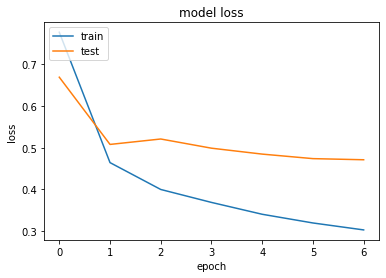

In [ ]:
# plot loss and accuracy curve
plot_loss_accuracy(model_5_history)

our model_5 is performing much better than all those previous models, in the sense that it is not overfitting a lot.

In [ ]:
model_5_pred_prob = model_5.predict(testing_x)
model_5_pred_prob

array([[6.3640721e-02, 3.4139827e-02, 9.0221941e-01],
       [9.9011022e-01, 4.1691177e-03, 5.7206536e-03],
       [9.9720734e-01, 1.1961918e-03, 1.5964875e-03],
       ...,
       [5.6846127e-02, 8.9204717e-01, 5.1106758e-02],
       [1.2691620e-02, 5.5527412e-03, 9.8175561e-01],
       [9.9894100e-01, 4.5671887e-04, 6.0236576e-04]], dtype=float32)

In [ ]:
model_5_pred = tf.argmax(model_5_pred_prob, axis=1)
model_5_pred

<tf.Tensor: shape=(3798,), dtype=int64, numpy=array([2, 0, 0, ..., 1, 2, 0])>

In [ ]:
model_5_parameters = calculate_score(testing_y, model_5_pred)
model_5_parameters

{'accuracy': 84.88678251711427,
 'f1-score': 0.8488758102081784,
 'precision': 0.8495852116858752,
 'recall': 0.8488678251711427}

In [ ]:
model_5.evaluate(testing_x, testing_y)

119/119 [==============================] - 1s 8ms/step - loss: 0.4712 - accuracy: 0.8489


[0.47115835547447205, 0.8488678336143494]

## MODEL 6: TENSORFLOW HUB PRETRAINED UNIVERSAL SENTENCE ENCODER

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embed_sample = embed(['this is kunal testing the universal sentence encoder', 'this is no one!'])
embed_sample

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.03781594, -0.01797395, -0.08027346, ..., -0.01605985,
         0.0705872 , -0.04811813],
       [ 0.01552097, -0.01813697, -0.04898697, ..., -0.01965387,
         0.03283056, -0.02071888]], dtype=float32)>

In [ ]:
embed_sample.shape

TensorShape([2, 512])

In [ ]:
# create a keras layer using the universal sentence encoder from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # We pass an empty list because input length of string can be of varying length
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

In [ ]:
# create model using sequential API
model_6 = tf.keras.Sequential(
    [
      layers.lambda(sentence_encoder_layer, output_shape=(512,)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv1D(256, 5, activation = 'relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv1D(512, 5, activation = 'relu'),
      tf.keras.layers.MaxPool1D(pool_size=4),
      tf.keras.layers.LSTM(128),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(32, activation = 'relu'),
      tf.keras.layers.Dense(3, activation = 'softmax')
    ]
)

ValueError: ignored